# Project: Medical Appointment No Shows-may-2016 dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. 
>  A number of characteristics about the patient are included in each row. This dataset cntains from fourteen columns, where  'PatientId' is the id of patient, 'AppointmentID' is the date id, 'ScheduledDay' contain the target day and time (date), 'AppointmentDay' is the target day only, 'Neighbourhood' is the location of the hospital, 'Scholarship' is pationt free or paid, 'Hipertension' is abnormally high blood pressure, 'Diabetes' is the sugar disease of patient, 'Alcoholism' tell us if the patient is an alcoholic or not, 'Handcap' is tell us patient have the body permenant isuue or not, finally 'No-show' is a person who has made a appointment but neither keeps nor cancels it where if the patient goes to his appointment mean NO-show is 'No' otherwise is 'Yes'. 
### My questions are:
<ul>
<li> Exploring with Visuals </li> 
<li> the relation between hipertension and patient attendance </li>
<ul>


In [97]:
import pandas  as pd
import numpy   as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

I will check the dataset, then I will clean the dataset to be ready for analysis.

### General Properties

In [98]:
# Load data
med_16= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

###  Dataset summary

I will display the first rows to observe database properties.

In [99]:
# Show first few rows of the dataset
med_16.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Show some properties of the dataset.

In [100]:
# Describe the dataset
med_16.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [101]:
# Number of rows and columns
med_16.shape

(110527, 14)

### Checking the missing data and duplicate rows in the data set

Check if there are any missing data in the dataset.

In [102]:
# features with missing values
med_16.info(),med_16.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(None, PatientId         0
 AppointmentID     0
 Gender            0
 ScheduledDay      0
 AppointmentDay    0
 Age               0
 Neighbourhood     0
 Scholarship       0
 Hipertension      0
 Diabetes          0
 Alcoholism        0
 Handcap           0
 SMS_received      0
 No-show           0
 dtype: int64)

To ensure that there is no missing data.

In [103]:
# checks if any of columns have null values
med_16.isnull().sum().any()

False

Check if there are any duplicate data in the dataset.

In [104]:
# duplicate rows dataset
med_16.duplicated().sum()

0

Note the age column to see if it contains logical data or not.

In [105]:
# checke ages 
med_16['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64


### Data Cleaning (Operations on the dataset)

###  Arranged dataset according  to AppointmentID

I noticed that the table is not arranged according to AppointmentID column and therefore I will sort it in ascending order.

In [106]:
# Ascending arrangement
med_16.sort_values(["AppointmentID"], axis=0, ascending=True, inplace=True) 
med_16

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
3764,8.322564e+14,5030230,F,2015-11-10T07:13:56Z,2016-05-04T00:00:00Z,51,RESISTÊNCIA,0,0,0,0,0,1,No
46292,9.163747e+13,5122866,M,2015-12-03T08:17:28Z,2016-05-02T00:00:00Z,34,VILA RUBIM,0,1,0,0,0,1,Yes
102795,1.216587e+12,5134197,F,2015-12-07T10:40:59Z,2016-06-03T00:00:00Z,27,SÃO CRISTÓVÃO,1,0,0,0,0,1,Yes
102797,3.189960e+13,5134220,F,2015-12-07T10:42:42Z,2016-06-03T00:00:00Z,48,MARUÍPE,0,1,1,0,0,1,No
102796,9.582232e+12,5134223,F,2015-12-07T10:43:01Z,2016-06-03T00:00:00Z,80,SÃO CRISTÓVÃO,0,1,1,0,0,1,No
102799,3.516254e+12,5134224,F,2015-12-07T10:43:17Z,2016-06-03T00:00:00Z,74,SÃO CRISTÓVÃO,0,1,1,0,0,1,No
102786,4.542871e+11,5134227,M,2015-12-07T10:43:34Z,2016-06-03T00:00:00Z,67,MARUÍPE,0,1,1,0,0,0,No
102791,9.416259e+14,5134228,F,2015-12-07T10:43:50Z,2016-06-03T00:00:00Z,77,SÃO CRISTÓVÃO,0,1,1,0,0,1,No
102792,3.512659e+14,5134233,M,2015-12-07T10:44:07Z,2016-06-03T00:00:00Z,73,MARUÍPE,0,1,1,0,1,0,Yes
102789,3.112342e+13,5134239,F,2015-12-07T10:44:25Z,2016-06-03T00:00:00Z,60,SÃO CRISTÓVÃO,0,1,1,0,0,1,No


Check if arranged is true.

In [107]:
# check
med_16.loc[med_16['AppointmentID'] == 5642903]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Replace spaces with underscores and lowercase labels for  the columns in the dataset

In [108]:
# replace spaces with underscores and lowercase labels for dataset
med_16.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
med_16.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
3764,8.322564e+14,5030230,F,2015-11-10T07:13:56Z,2016-05-04T00:00:00Z,51,RESISTÊNCIA,0,0,0,0,0,1,No


### Replace ages that are equal and less than 0 with the mean ages 

In [109]:
# replace with mean age
med_16[med_16['age'] <= 0] = med_16['age'].mean()

In [110]:
# Check
med_16['age'].value_counts()

37.088874     3540
1.000000      2273
52.000000     1746
49.000000     1652
53.000000     1651
56.000000     1635
38.000000     1629
59.000000     1624
2.000000      1618
50.000000     1613
57.000000     1603
36.000000     1580
51.000000     1567
19.000000     1545
39.000000     1536
37.000000     1533
54.000000     1530
34.000000     1526
33.000000     1524
6.000000      1521
30.000000     1521
3.000000      1513
17.000000     1509
32.000000     1505
5.000000      1489
18.000000     1487
44.000000     1487
58.000000     1469
46.000000     1460
45.000000     1453
              ... 
72.000000      615
74.000000      602
76.000000      571
75.000000      544
78.000000      541
77.000000      527
80.000000      511
81.000000      434
82.000000      392
79.000000      390
84.000000      311
83.000000      280
85.000000      275
86.000000      260
87.000000      184
89.000000      173
88.000000      126
90.000000      109
92.000000       86
91.000000       66
93.000000       53
94.000000   

### Convert No-show column to numeric numbers

In [111]:
# Convert No-show to numeric numbers
med_16['no_show'] = med_16['no_show'].map({'Yes': 1, 'No': 0})
med_16.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
3764,8.322564e+14,5030230.0,F,2015-11-10T07:13:56Z,2016-05-04T00:00:00Z,51.0,RESISTÊNCIA,0.0,0.0,0.0,0.0,0.0,1.0,0.0
46292,9.163747e+13,5122866.0,M,2015-12-03T08:17:28Z,2016-05-02T00:00:00Z,34.0,VILA RUBIM,0.0,1.0,0.0,0.0,0.0,1.0,1.0
102795,1.216587e+12,5134197.0,F,2015-12-07T10:40:59Z,2016-06-03T00:00:00Z,27.0,SÃO CRISTÓVÃO,1.0,0.0,0.0,0.0,0.0,1.0,1.0
102797,3.189960e+13,5134220.0,F,2015-12-07T10:42:42Z,2016-06-03T00:00:00Z,48.0,MARUÍPE,0.0,1.0,1.0,0.0,0.0,1.0,0.0
102796,9.582232e+12,5134223.0,F,2015-12-07T10:43:01Z,2016-06-03T00:00:00Z,80.0,SÃO CRISTÓVÃO,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [112]:
# Check it converted
med_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 3764 to 87223
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null float64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null float64
neighbourhood     110527 non-null object
scholarship       110527 non-null float64
hipertension      110527 non-null float64
diabetes          110527 non-null float64
alcoholism        110527 non-null float64
handcap           110527 non-null float64
sms_received      110527 non-null float64
no_show           106987 non-null float64
dtypes: float64(10), object(4)
memory usage: 12.6+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Exploring with Visuals)

### Exploring all columns

In first, I will check all dataset in visual form as:

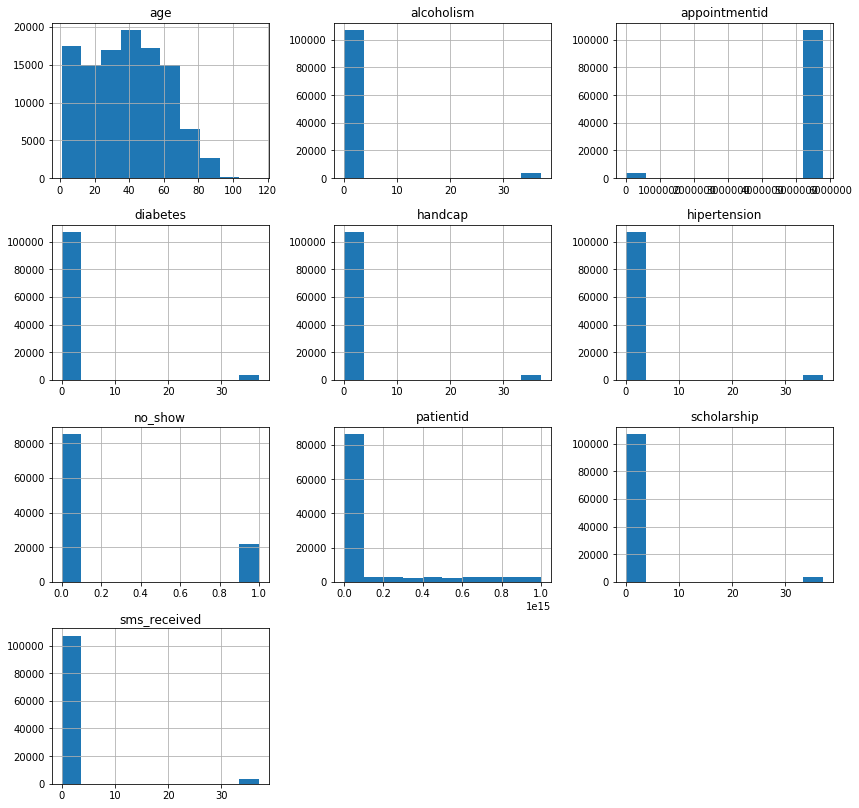

In [113]:
med_16.hist(figsize=(14,14));

### Magnifying No-Show column to observe it in details

Show in histogram shape

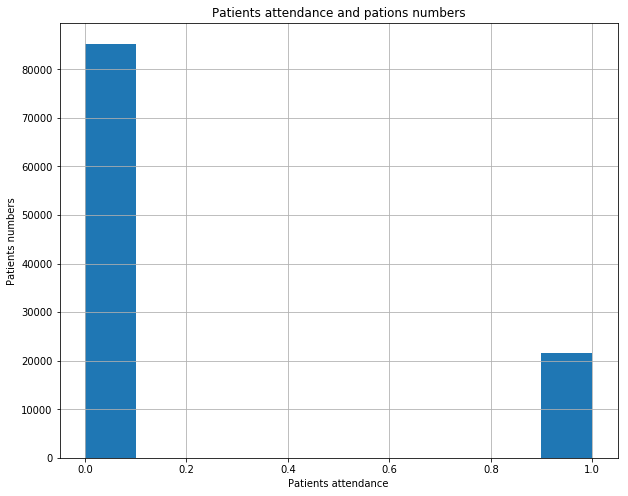

In [147]:
med_16.no_show.hist(figsize=(10,8));
plt.title("Patients attendance and pations numbers");
plt.xlabel("Patients attendance");
plt.ylabel("Patients numbers");

### Explore no_show column in Pie chart which has the percentage of patients showed up and  not

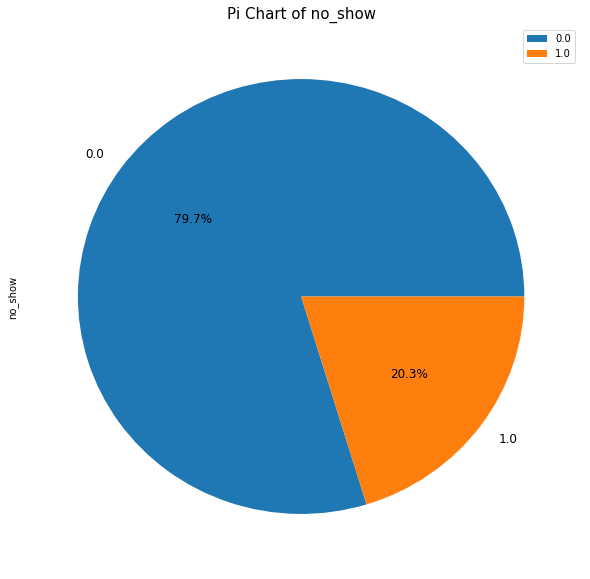

In [115]:
values = med_16['no_show'].value_counts()
pieChart = values.plot.pie(figsize=(10,10),autopct='%1.1f%%', fontsize = 12);
pieChart.set_title("Pi Chart of no_show", fontsize = 15);
plt.legend();

### Research Question 2  (what are factors affecting  the patient's attendance)

I want to know what factors affecting the patient's attendance, so I will make some calculations to know that then visualize the results.

### I will test the relation between SMS received and patient attendance, then making a histogram to see this relation.

To study this relationship, I will make a filter for patients received SMS and not received, then I will calculate the percentage of each type to know is this influencing factor or not.

In [116]:
# Number of pations recieved SMS and not recieved
med_16['sms_received'].value_counts()

0.000000     72402
1.000000     34585
37.088874     3540
Name: sms_received, dtype: int64

I will write a function to use it many times in calculations.

In [117]:
# function to perform a query,execute value counts, then calculate the percntage 
var = 1
def qu_cou(var, df,x):
    global var1
    var = df.query(x) 
    var1= var
    vv  = var['no_show'].value_counts()
    per = (vv[0]/(vv[0]+vv[1])) * 100
    #return vv, per
    print(vv)
    print("Percentage=", per,"%")

Patients who received SMS.

In [118]:
# filter rows with recieved sms
qu_cou(var, med_16,'sms_received == 1')

0.0    25017
1.0     9568
Name: no_show, dtype: int64
Percentage= 72.3348272372 %


Visualize this relation.

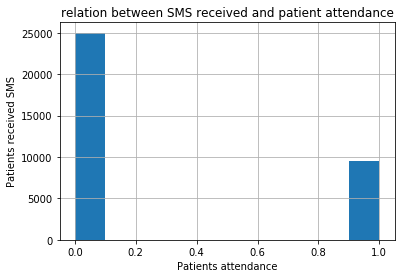

In [119]:
var1['no_show'].hist();
plt.title("relation between SMS received and patient attendance");
plt.xlabel("Patients attendance");
plt.ylabel("Patients received SMS");

Patients who not received SMS.

In [120]:
# filter rows with not recieved sms
qu_cou(var, med_16,'sms_received == 0')

0.0    60290
1.0    12112
Name: no_show, dtype: int64
Percentage= 83.2711803541 %


Visualize this relation.

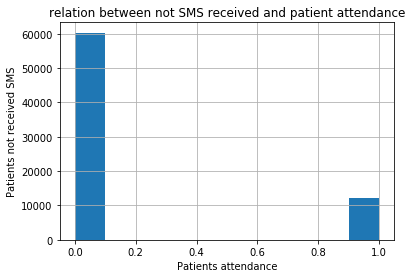

In [121]:
# The relation between patients not received SMS and no show
var1['no_show'].hist();
plt.title("relation between not SMS received and patient attendance");
plt.xlabel("Patients attendance");
plt.ylabel("Patients not received SMS");

### I will test the relation between age of patient and his attendance, then making a histogram to see this relation.

Patients who have age less than or equal the mean age.

In [122]:
# filter rows with age less than mean
m_age = med_16['age'].mean()
m_age

38.276779562546061

In [123]:
qu_cou(var, med_16,'age <= 38.276779562546061')

0.0    41764
1.0    12442
Name: no_show, dtype: int64
Percentage= 77.0468213851 %


Visualize this relation.

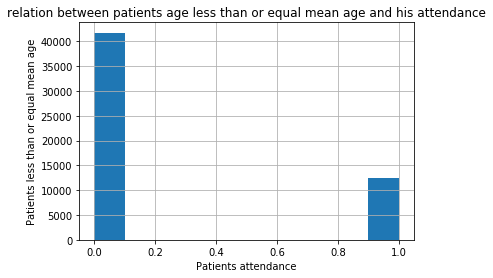

In [124]:
# The relation between patients average age less than the mean and no show
var1['no_show'].hist();
plt.title("relation between patients age less than or equal mean age and his attendance");
plt.xlabel("Patients attendance");
plt.ylabel("Patients less than or equal mean age");

Patients who have age more than the mean age.

In [125]:
# filter rows with age more than mean
qu_cou(var, med_16,'age > 38.276779562546061')

0.0    43543
1.0     9238
Name: no_show, dtype: int64
Percentage= 82.4974896269 %


Visualize this relation.

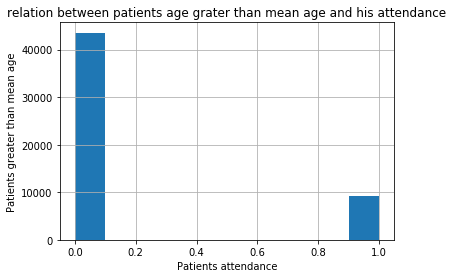

In [126]:
var1['no_show'].hist();
plt.title("relation between patients age grater than mean age and his attendance");
plt.xlabel("Patients attendance");
plt.ylabel("Patients greater than mean age");

### I will test the relation between alcoholism and patient attendance, then making a histogram to see this relation.			

Patients who drink alcohol very much.

In [127]:
# filter rows with patients drink alcohol
qu_cou(var, med_16,'alcoholism == 1')

0.0    2683
1.0     677
Name: no_show, dtype: int64
Percentage= 79.8511904762 %


Visualize this relation.

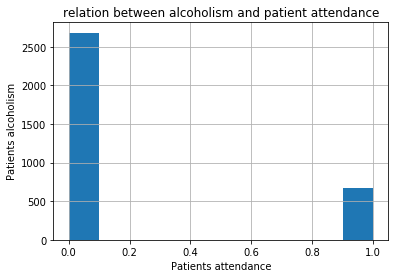

In [128]:
var1['no_show'].hist();
plt.title("relation between alcoholism and patient attendance");
plt.xlabel("Patients attendance");
plt.ylabel("Patients alcoholism");

Patients do not drink alcohol very much.

In [129]:
# filter rows with patients not drink alcohol very muuch
qu_cou(var, med_16,'alcoholism == 0')

0.0    82624
1.0    21003
Name: no_show, dtype: int64
Percentage= 79.7321161473 %


Visualize this relation.

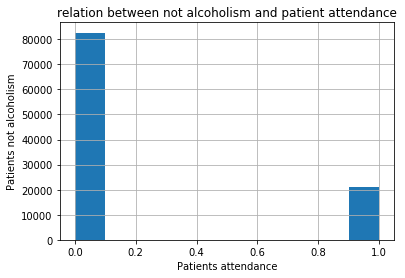

In [130]:
var1['no_show'].hist();
plt.title("relation between not alcoholism and patient attendance");
plt.xlabel("Patients attendance");
plt.ylabel("Patients not alcoholism");

### I will test the relation between diabetes and patient attendance, then making a histogram to see this relation.

Patients have diabetes disease.

In [131]:
# filter rows with diabetes patients
qu_cou(var, med_16,'diabetes == 1')

0.0    6513
1.0    1430
Name: no_show, dtype: int64
Percentage= 81.9967266776 %


Visualize this relation.

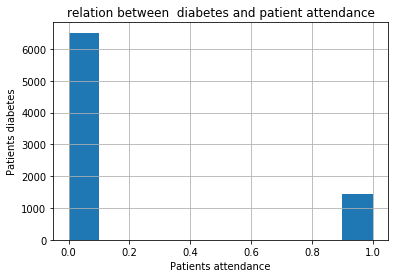

In [132]:
var1['no_show'].hist();
plt.title("relation between  diabetes and patient attendance");
plt.xlabel("Patients attendance");
plt.ylabel("Patients diabetes");

Patients do not have diabetes disease.

In [133]:
# Not diabetes patients 
qu_cou(var, med_16,'diabetes == 0')

0.0    78794
1.0    20250
Name: no_show, dtype: int64
Percentage= 79.5545414159 %


Visualize this relation.

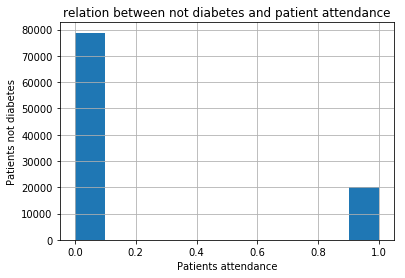

In [134]:
var1['no_show'].hist();
plt.title("relation between not diabetes and patient attendance");
plt.xlabel("Patients attendance");
plt.ylabel("Patients not diabetes");

### I will test the relation between hipertension and patient attendance, then making a histogram to see this relation.

Patients have hipertension disease.

In [135]:
# filter rows with hipertension patients
qu_cou(var, med_16,'hipertension == 1')

0.0    18029
1.0     3772
Name: no_show, dtype: int64
Percentage= 82.6980413742 %


Visualize this relation.

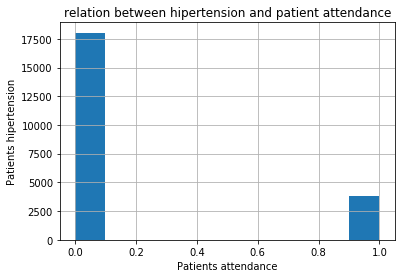

In [136]:
var1['no_show'].hist();
plt.title("relation between hipertension and patient attendance");
plt.xlabel("Patients attendance");
plt.ylabel("Patients hipertension");

Patients do not have hipertension disease.

In [137]:
# Not hipertension patients 
qu_cou(var, med_16,'hipertension == 0')

0.0    67278
1.0    17908
Name: no_show, dtype: int64
Percentage= 78.9777662996 %


Visualize this relation.

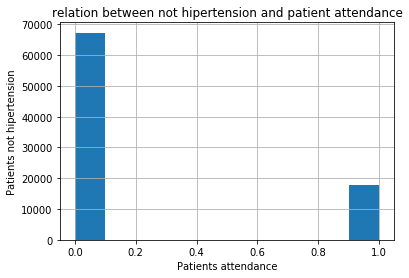

In [138]:
var1['no_show'].hist();
plt.title("relation between not hipertension and patient attendance");
plt.xlabel("Patients attendance");
plt.ylabel("Patients not hipertension");

### I will test the relation between gender and patient attendance, then making a histogram to see this relation.

Filter dataset with female patients only.

In [139]:
# filter rows with Female patients
qu_cou(var, med_16,'gender == "F"')

0.0    55843
1.0    14275
Name: no_show, dtype: int64
Percentage= 79.6414615363 %


Visualize this relation.

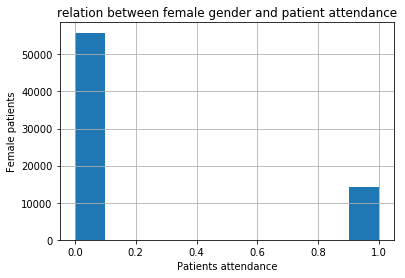

In [140]:
var1['no_show'].hist();
plt.title("relation between female gender and patient attendance");
plt.xlabel("Patients attendance");
plt.ylabel("Female patients");

Filter dataset with male patients only.

In [141]:
# filter rows with male patients
qu_cou(var, med_16,'gender == "M"')

0.0    29464
1.0     7405
Name: no_show, dtype: int64
Percentage= 79.9153760612 %


Visualize this relation.

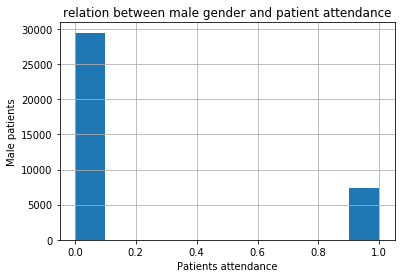

In [142]:
var1['no_show'].hist();
plt.title("relation between male gender and patient attendance");
plt.xlabel("Patients attendance");
plt.ylabel("Male patients");

### I will test the relation between pations  have scholarship and pations who attend and not attend

I will make this relation by using a 2D plot, first I will create two columns one for patients who attend and other for not attending patients.

In [143]:
 # filter the patients attended and not attended 
attend   = med_16['no_show'] == 0
n_attend = med_16['no_show'] == 1

In [144]:
# add two columns to dataset
med_16['attend']   = attend
med_16['n_attend'] = n_attend

Visualize this relation.

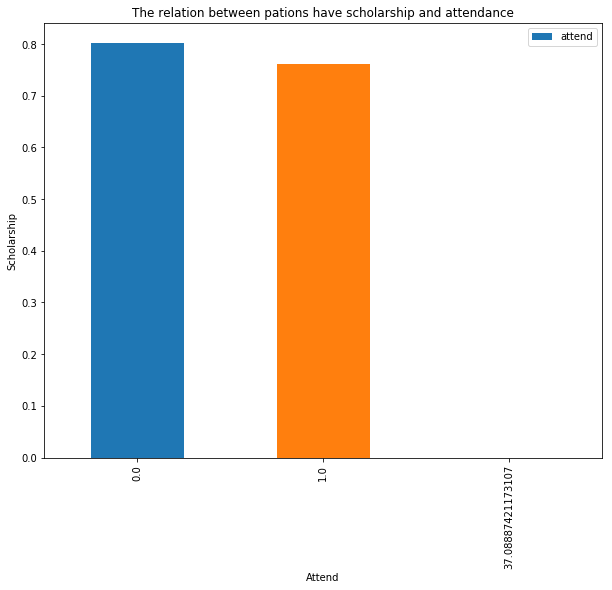

In [145]:
# The relation between pations have scholarship and attendance
med_16.groupby('scholarship')['attend'].mean().plot(kind='bar',figsize=(10,8));
plt.xlabel("Attend");
plt.ylabel("Scholarship");
plt.title("The relation between pations have scholarship and attendance");
plt.legend();

<a id='conclusions'></a>
## Conclusions

> **Tip**: There is no relation between SMS received and patients go to their scheduled appointment or not, most patients over 38 years old go to their scheduled appointment, I also noticed that patients who have diabetes and stress go to their scheduled appointments more than those who do not have these diseases. Finally, I noticed that men are more committed to going to their scheduled appointments than women.

### Limitations:

I see some patients age less than or equal to zero are illogical, else, if we know if the patient is work or not that may be a useful feature on impacts showing to the appointment.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [146]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0